In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# File paths
events_file = "pythia_run_output_events.parquet"
particles_file = "pythia_run_output_particles.parquet"

print("Setting up visualization environment...")
print(f"Events file: {events_file}")
print(f"Particles file: {particles_file}")

# Load the data
try:
    events_df = pd.read_parquet(events_file)
    particles_df = pd.read_parquet(particles_file)
    
    print("Data loaded successfully!")
    print(f"Events: {len(events_df)} events")
    print(f"Particles: {len(particles_df)} particles")
    print(f"Average particles per event: {len(particles_df)/len(events_df):.1f}")
    
    # Display basic info about the data
    print("\nEvent-level columns:", list(events_df.columns))
    print("Particle-level columns:", list(particles_df.columns))
    
except FileNotFoundError as e:
    print(f"Error: Could not find data files. Make sure you have run the pythia_parquet.py script first.")
    print(f"Looking for: {events_file} and {particles_file}")
    print("You may need to adjust the file paths above.")

Setting up visualization environment...
Events file: pythia_run_output_events.parquet
Particles file: pythia_run_output_particles.parquet
Data loaded successfully!
Events: 10000 events
Particles: 12344992 particles
Average particles per event: 1234.5

Event-level columns: ['event_id', 'impact_parameter', 'n_participants', 'n_collisions', 'n_particles', 'mean_pT', 'mean_eta', 'mean_phi', 'event_plane_angle']
Particle-level columns: ['event_id', 'particle_id', 'pT', 'eta', 'phi']


In [2]:
# Display sample data and statistics
print("Sample event-level data:")
display(events_df.head())
print("\nEvent-level data statistics:")
display(events_df.describe())

print("\n" + "="*50)
print("Sample particle-level data:")
display(particles_df.head())
print("\nParticle-level data statistics:")
display(particles_df.describe())

Sample event-level data:


,event_id,impact_parameter,n_participants,n_collisions,n_particles,mean_pT,mean_eta,mean_phi,event_plane_angle
0,0,8.545843,154,429,1207,0.353834,0.018519,-0.024113,-0.670309
1,1,1.132128,409,2427,4126,0.392507,-0.006532,-0.059654,1.207451
2,2,13.849715,2,1,16,0.248286,0.252522,-0.186909,0.725681
3,3,13.928982,21,23,74,0.365487,0.160631,0.193074,0.013607
4,4,11.519975,43,57,235,0.303292,0.018947,-0.083738,-1.424473



Event-level data statistics:


,event_id,impact_parameter,n_participants,n_collisions,n_particles,mean_pT,mean_eta,mean_phi,event_plane_angle
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,9.599730,135.600200,537.529100,1234.499200,0.367614,0.001002,0.000882,-0.001281
std,2886.89568,3.785581,123.387663,640.721992,1222.777266,0.069727,0.074703,0.215995,0.895122
min,0.00000,0.099196,2.000000,1.000000,0.000000,0.000000,-0.914004,-2.766375,-1.570555
25%,2499.75000,6.840520,24.000000,29.750000,162.000000,0.355664,-0.018933,-0.052715,-0.768328
50%,4999.50000,9.943081,100.000000,249.000000,811.000000,0.377217,0.000000,0.000000,0.000000
75%,7499.25000,12.691616,226.000000,870.000000,2061.250000,0.392247,0.018447,0.051616,0.761357
max,9999.00000,20.742562,416.000000,2675.000000,4671.000000,1.663049,0.941958,2.855426,1.570656



Sample particle-level data:


,event_id,particle_id,pT,eta,phi
0,0,211,0.462592,-0.809620,0.341154
1,0,321,1.467189,-0.600279,-2.262436
2,0,211,0.590608,-0.277690,0.192610
3,0,-211,0.344339,-0.376589,2.016544
4,0,321,0.236663,0.300242,0.306678



Particle-level data statistics:


,event_id,particle_id,pT,eta,phi
count,1.234499e+07,1.234499e+07,1.234499e+07,1.234499e+07,1.234499e+07
mean,5.023156e+03,1.386433e+01,3.831381e-01,-1.992185e-04,-1.274802e-03
std,2.893290e+03,4.335236e+02,4.292025e-01,5.798791e-01,1.813975e+00
min,0.000000e+00,-2.212000e+03,1.002287e-06,-9.999995e-01,-3.141591e+00
25%,2.528000e+03,2.200000e+01,1.235881e-01,-5.046683e-01,-1.573535e+00
50%,5.028000e+03,2.200000e+01,2.653101e-01,5.035642e-05,-8.306020e-04
75%,7.517000e+03,2.200000e+01,4.951856e-01,5.038710e-01,1.569272e+00
max,9.999000e+03,2.212000e+03,3.806617e+01,9.999999e-01,3.141591e+00


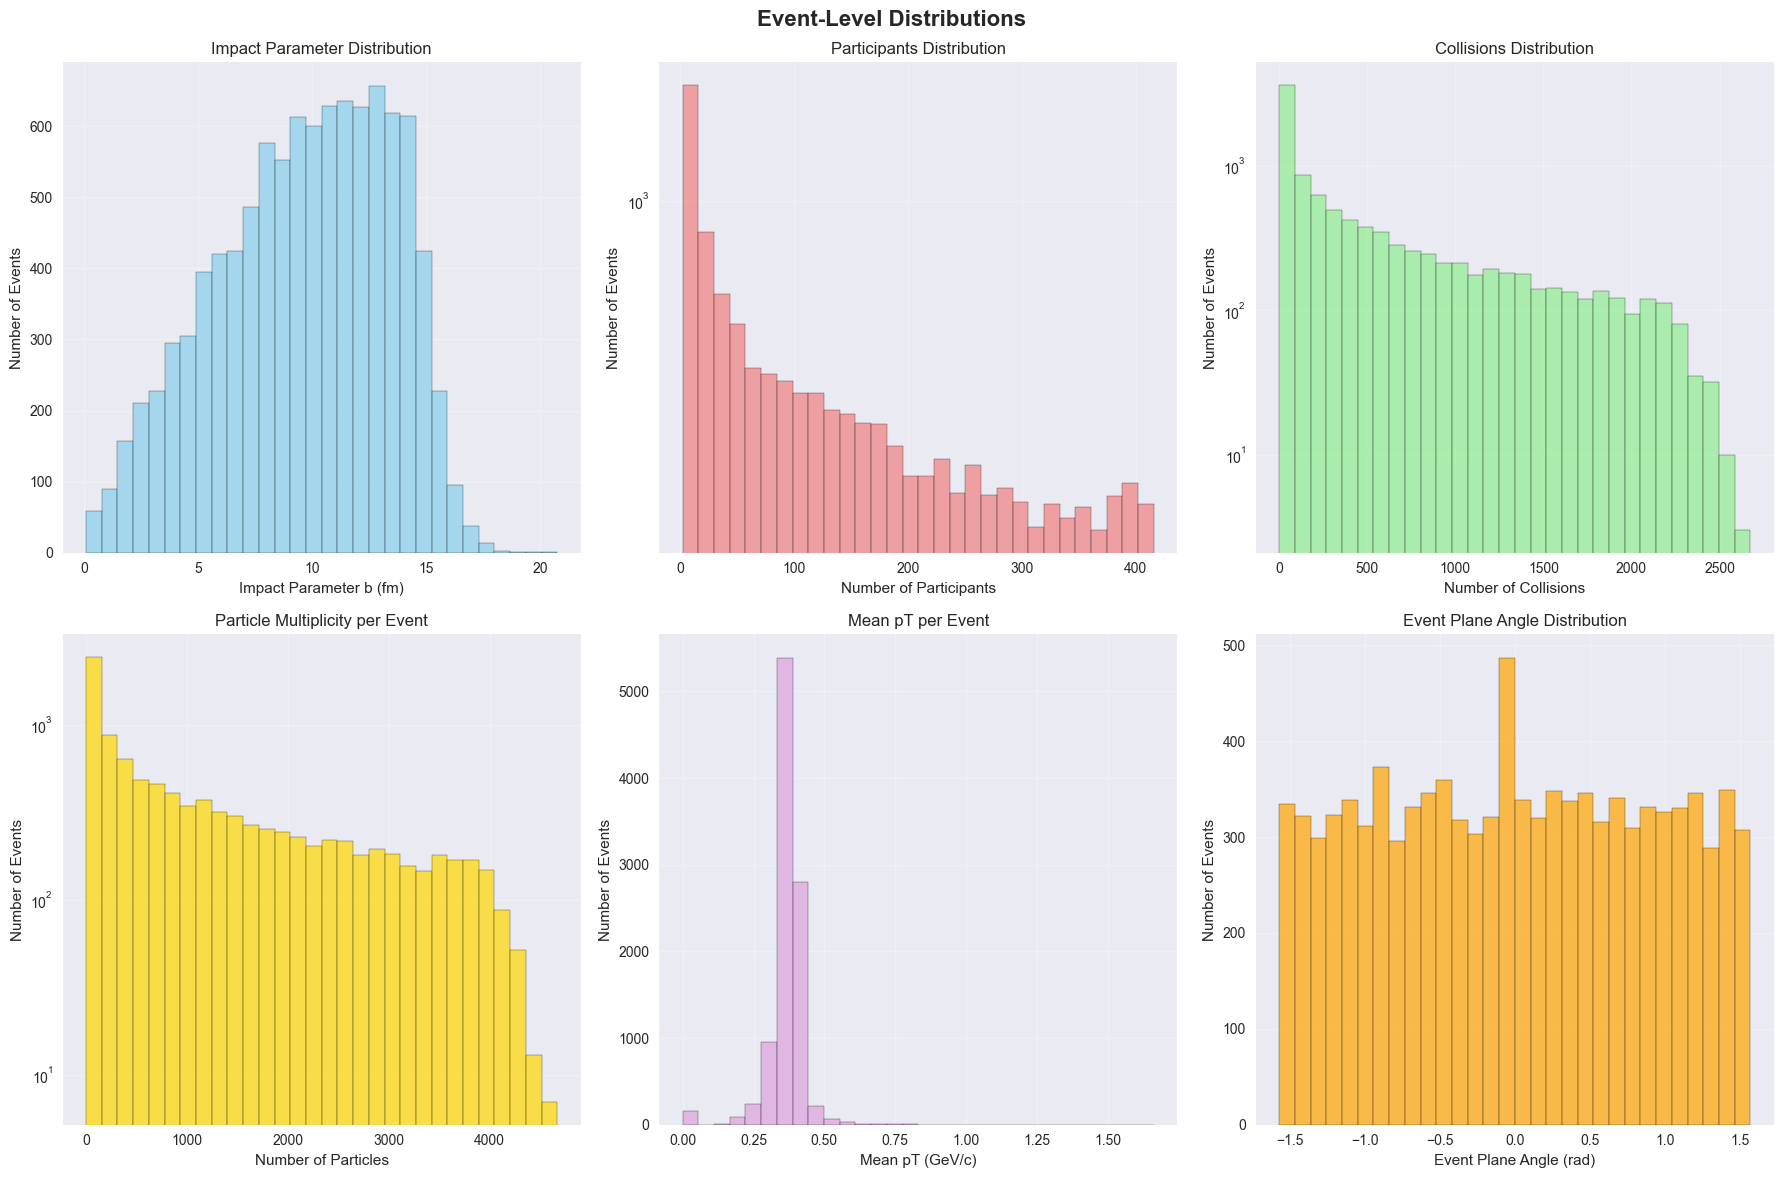

In [3]:
# Event-level histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Event-Level Distributions', fontsize=16, fontweight='bold')

# Impact parameter
axes[0,0].hist(events_df['impact_parameter'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Impact Parameter b (fm)')
axes[0,0].set_ylabel('Number of Events')
axes[0,0].set_title('Impact Parameter Distribution')
axes[0,0].grid(True, alpha=0.3)

# Number of participants
axes[0,1].hist(events_df['n_participants'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_xlabel('Number of Participants')
axes[0,1].set_ylabel('Number of Events')
axes[0,1].set_title('Participants Distribution')
axes[0,1].set_yscale('log')  # Log scale for better visibility
axes[0,1].grid(True, alpha=0.3)

# Number of collisions
axes[0,2].hist(events_df['n_collisions'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_xlabel('Number of Collisions')
axes[0,2].set_ylabel('Number of Events')
axes[0,2].set_title('Collisions Distribution')
axes[0,2].set_yscale('log')  # Log scale for better visibility
axes[0,2].grid(True, alpha=0.3)

# Number of particles per event
axes[1,0].hist(events_df['n_particles'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1,0].set_xlabel('Number of Particles')
axes[1,0].set_ylabel('Number of Events')
axes[1,0].set_title('Particle Multiplicity per Event')
axes[1,0].set_yscale('log')  # Log scale for better visibility
axes[1,0].grid(True, alpha=0.3)

# Mean pT per event
axes[1,1].hist(events_df['mean_pT'], bins=30, alpha=0.7, color='plum', edgecolor='black')
axes[1,1].set_xlabel('Mean pT (GeV/c)')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].set_title('Mean pT per Event')
axes[1,1].grid(True, alpha=0.3)

# Event plane angle
axes[1,2].hist(events_df['event_plane_angle'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,2].set_xlabel('Event Plane Angle (rad)')
axes[1,2].set_ylabel('Number of Events')
axes[1,2].set_title('Event Plane Angle Distribution')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

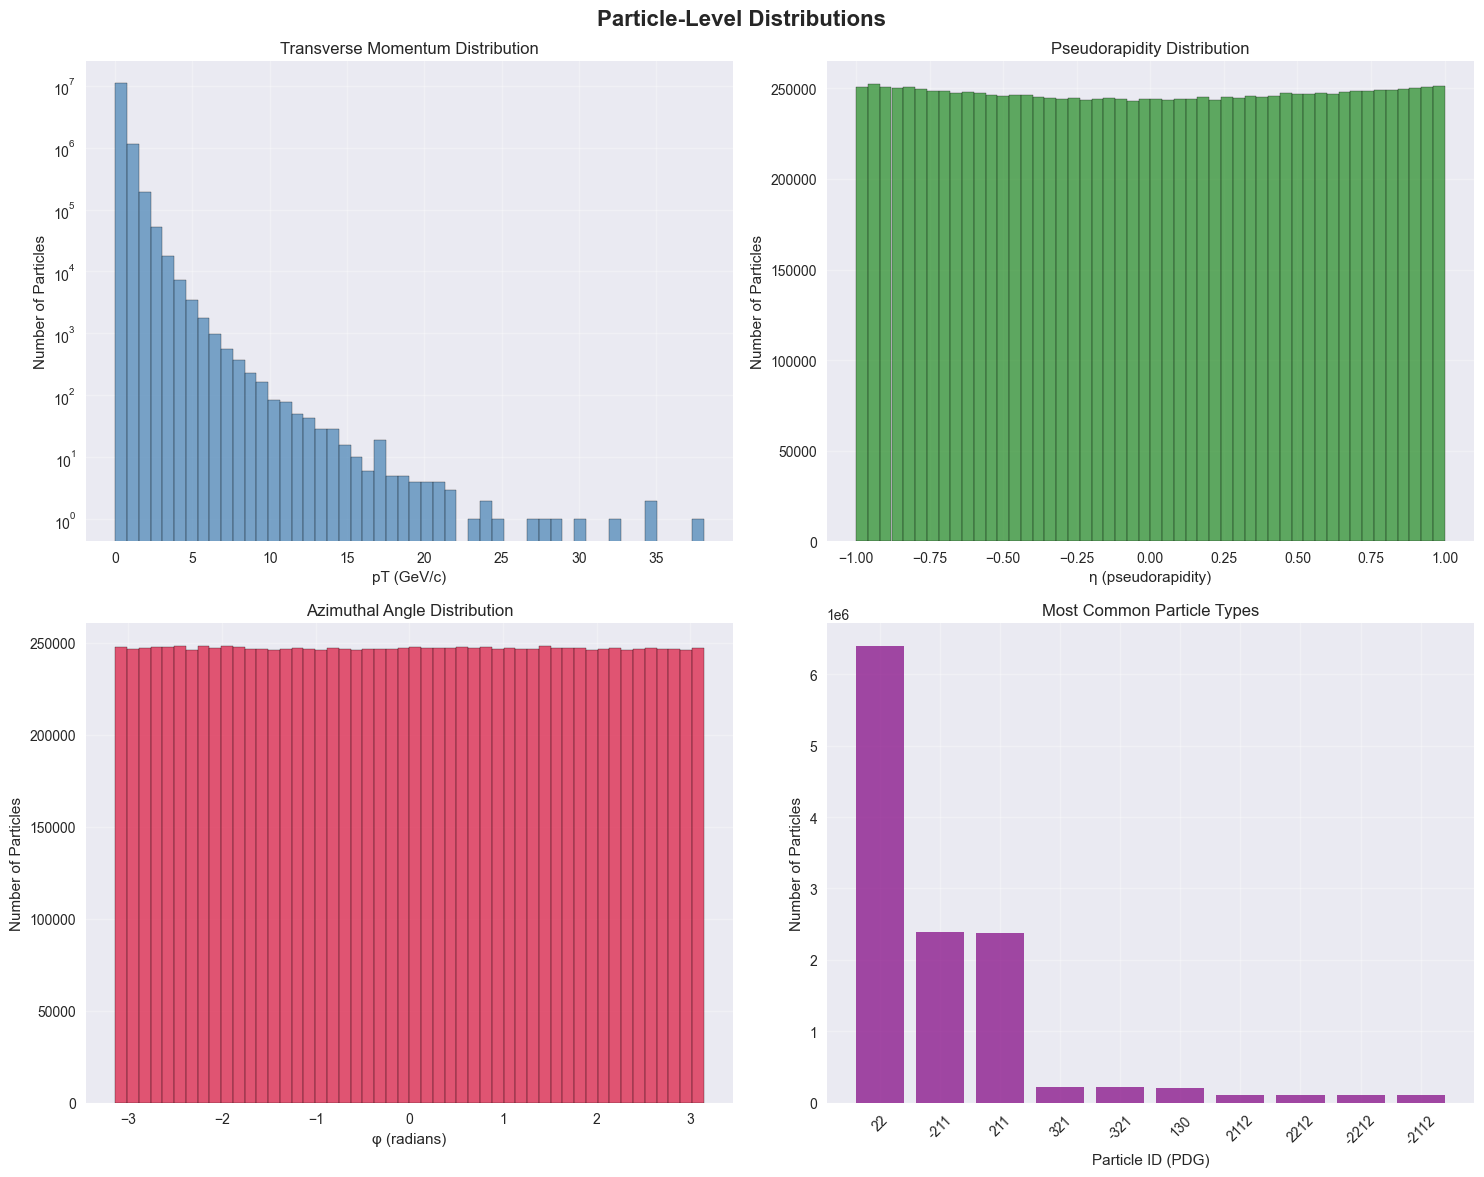

Most common particles (PDG IDs):
  PDG 22: 6401374 particles
  PDG -211: 2391670 particles
  PDG 211: 2381073 particles
  PDG 321: 213336 particles
  PDG -321: 213220 particles


In [4]:
# Particle-level histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Particle-Level Distributions', fontsize=16, fontweight='bold')

# pT distribution
axes[0,0].hist(particles_df['pT'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0,0].set_xlabel('pT (GeV/c)')
axes[0,0].set_ylabel('Number of Particles')
axes[0,0].set_title('Transverse Momentum Distribution')
axes[0,0].set_yscale('log')  # Log scale for better visibility
axes[0,0].grid(True, alpha=0.3)

# eta distribution
axes[0,1].hist(particles_df['eta'], bins=50, alpha=0.7, color='forestgreen', edgecolor='black')
axes[0,1].set_xlabel('η (pseudorapidity)')
axes[0,1].set_ylabel('Number of Particles')
axes[0,1].set_title('Pseudorapidity Distribution')
axes[0,1].grid(True, alpha=0.3)

# phi distribution
axes[1,0].hist(particles_df['phi'], bins=50, alpha=0.7, color='crimson', edgecolor='black')
axes[1,0].set_xlabel('φ (radians)')
axes[1,0].set_ylabel('Number of Particles')
axes[1,0].set_title('Azimuthal Angle Distribution')
axes[1,0].grid(True, alpha=0.3)

# Particle ID distribution (most common particles)
particle_counts = particles_df['particle_id'].value_counts().head(10)
axes[1,1].bar(range(len(particle_counts)), particle_counts.values, alpha=0.7, color='purple')
axes[1,1].set_xlabel('Particle ID (PDG)')
axes[1,1].set_ylabel('Number of Particles')
axes[1,1].set_title('Most Common Particle Types')
axes[1,1].set_xticks(range(len(particle_counts)))
axes[1,1].set_xticklabels(particle_counts.index, rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the most common particles
print("Most common particles (PDG IDs):")
for pid, count in particle_counts.head().items():
    print(f"  PDG {pid}: {count} particles")

# Centrality Analysis

Let's perform centrality selection based on particle multiplicity and examine correlations with geometric quantities.

In [8]:
from scipy import stats
from sklearn.neighbors import KernelDensity

# First, let's examine the multiplicity distribution and define centrality
print("Centrality Selection Based on Particle Multiplicity")
print("="*50)

# Calculate Npart/2 (number of participant pairs) - needed for later analysis
events_df['npart_over_2'] = events_df['n_participants'] / 2.0

# Calculate percentiles for centrality classes
multiplicity = events_df['n_particles'].values
percentiles = [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]  # Most central = highest multiplicity
multiplicity_cuts = np.percentile(multiplicity, percentiles)

print("Centrality classes (based on particle multiplicity):")
for i, (p_high, p_low) in enumerate(zip(percentiles[:-1], percentiles[1:])):
    cut_high = multiplicity_cuts[i]
    cut_low = multiplicity_cuts[i+1]
    count = np.sum((multiplicity >= cut_low) & (multiplicity < cut_high))
    print(f"  {p_low:2d}-{p_high:2d}%: {cut_low:4.0f} ≤ Npart < {cut_high:4.0f} ({count:4d} events)")

# Select 10% most central events (highest multiplicity)
central_cut = multiplicity_cuts[0]  # 90th percentile
central_events = events_df[events_df['n_particles'] >= central_cut].copy()
peripheral_events = events_df[events_df['n_particles'] < central_cut].copy()

print(f"\nMost central 10% selection:")
print(f"  Cut: Nparticles ≥ {central_cut:.0f}")
print(f"  Central events: {len(central_events)} ({len(central_events)/len(events_df)*100:.1f}%)")
print(f"  Peripheral events: {len(peripheral_events)} ({len(peripheral_events)/len(events_df)*100:.1f}%)")

Centrality Selection Based on Particle Multiplicity
Centrality classes (based on particle multiplicity):
  80-90%: 2431 ≤ Npart < 3246 ( 997 events)
  70-80%: 1750 ≤ Npart < 2431 (1000 events)
  60-70%: 1224 ≤ Npart < 1750 (1002 events)
  50-60%:  811 ≤ Npart < 1224 (1000 events)
  40-50%:  473 ≤ Npart <  811 (1001 events)
  30-40%:  246 ≤ Npart <  473 (1001 events)
  20-30%:  101 ≤ Npart <  246 (1009 events)
  10-20%:   31 ≤ Npart <  101 ( 989 events)
   0-10%:    0 ≤ Npart <   31 ( 998 events)

Most central 10% selection:
  Cut: Nparticles ≥ 3246
  Central events: 1003 (10.0%)
  Peripheral events: 8997 (90.0%)



Kernel Density Estimation Analysis


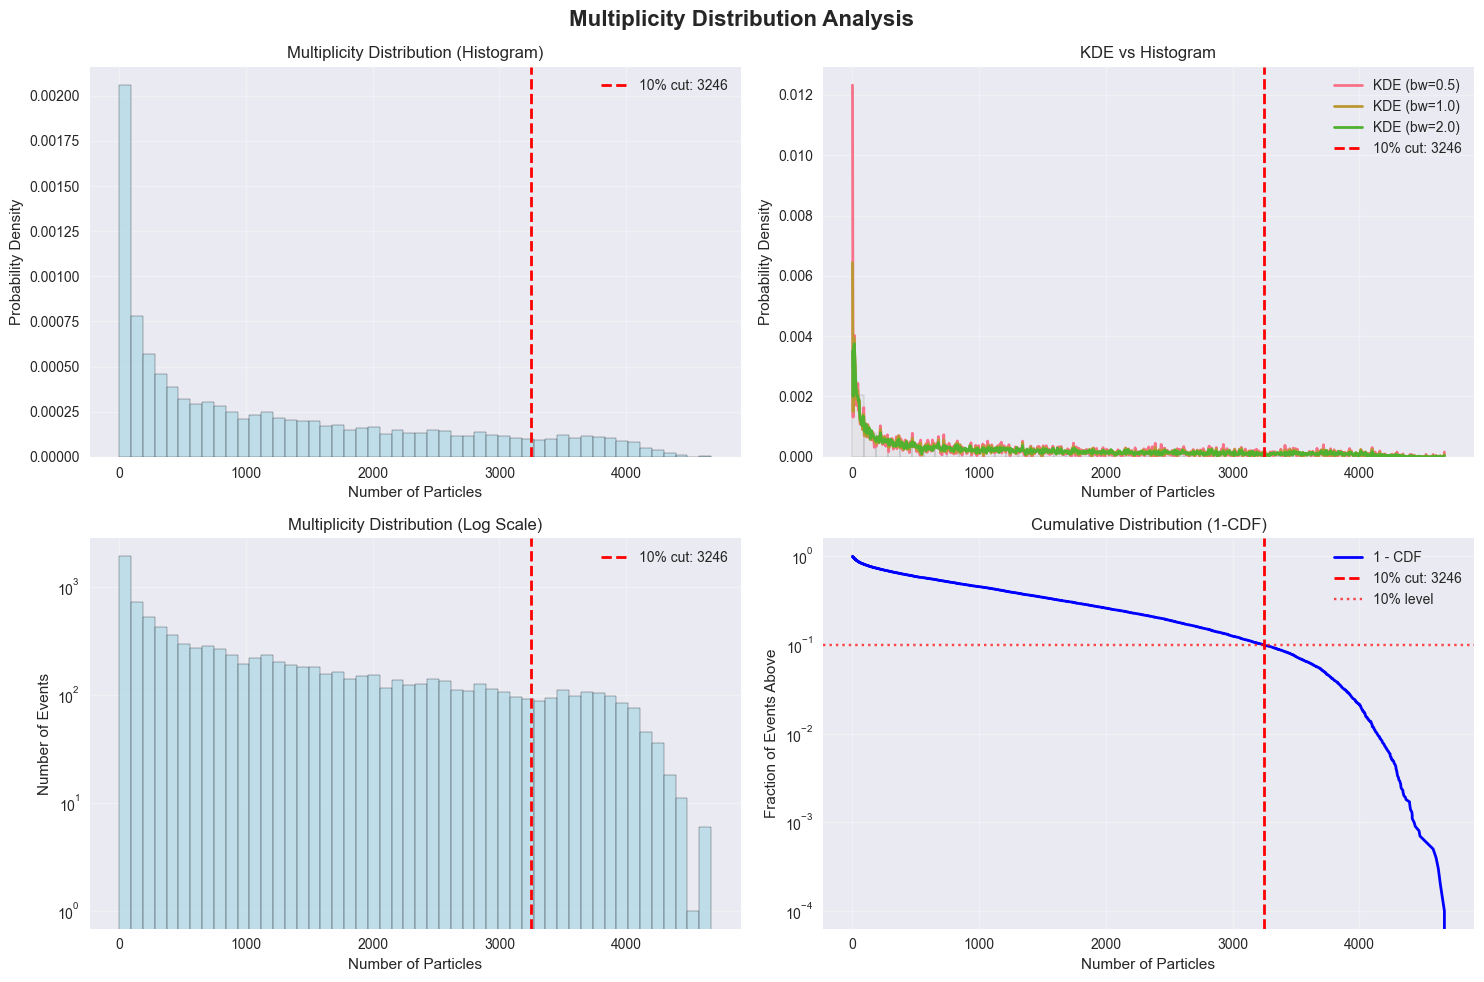

Optimal KDE bandwidth: 10.000


In [9]:
# Advanced KDE analysis of multiplicity distribution
print("\nKernel Density Estimation Analysis")
print("="*35)

# Prepare data for KDE
mult_data = multiplicity.reshape(-1, 1)

# Fit KDE with different bandwidths
bandwidths = [0.5, 1.0, 2.0]
kde_models = {}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Multiplicity Distribution Analysis', fontsize=16, fontweight='bold')

# Plot histogram
axes[0,0].hist(multiplicity, bins=50, alpha=0.7, density=True, color='lightblue', edgecolor='black')
axes[0,0].set_xlabel('Number of Particles')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].set_title('Multiplicity Distribution (Histogram)')
axes[0,0].axvline(central_cut, color='red', linestyle='--', linewidth=2, label=f'10% cut: {central_cut:.0f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# KDE analysis
x_range = np.linspace(multiplicity.min(), multiplicity.max(), 1000)
for bandwidth in bandwidths:
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(mult_data)
    kde_models[bandwidth] = kde
    
    log_density = kde.score_samples(x_range.reshape(-1, 1))
    density = np.exp(log_density)
    
    axes[0,1].plot(x_range, density, label=f'KDE (bw={bandwidth})', linewidth=2)

axes[0,1].hist(multiplicity, bins=50, alpha=0.3, density=True, color='lightgray', edgecolor='black')
axes[0,1].axvline(central_cut, color='red', linestyle='--', linewidth=2, label=f'10% cut: {central_cut:.0f}')
axes[0,1].set_xlabel('Number of Particles')
axes[0,1].set_ylabel('Probability Density')
axes[0,1].set_title('KDE vs Histogram')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Log-scale plot
axes[1,0].hist(multiplicity, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[1,0].axvline(central_cut, color='red', linestyle='--', linewidth=2, label=f'10% cut: {central_cut:.0f}')
axes[1,0].set_xlabel('Number of Particles')
axes[1,0].set_ylabel('Number of Events')
axes[1,0].set_title('Multiplicity Distribution (Log Scale)')
axes[1,0].set_yscale('log')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_mult = np.sort(multiplicity)
cumulative = np.arange(1, len(sorted_mult) + 1) / len(sorted_mult)
axes[1,1].plot(sorted_mult, 1 - cumulative, linewidth=2, color='blue', label='1 - CDF')
axes[1,1].axvline(central_cut, color='red', linestyle='--', linewidth=2, label=f'10% cut: {central_cut:.0f}')
axes[1,1].axhline(0.1, color='red', linestyle=':', alpha=0.7, label='10% level')
axes[1,1].set_xlabel('Number of Particles')
axes[1,1].set_ylabel('Fraction of Events Above')
axes[1,1].set_title('Cumulative Distribution (1-CDF)')
axes[1,1].set_yscale('log')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find the optimal bandwidth using cross-validation
from sklearn.model_selection import GridSearchCV
bandwidths_cv = np.logspace(-1, 1, 20)
grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidths_cv}, cv=5)
grid.fit(mult_data)
optimal_bandwidth = grid.best_params_['bandwidth']
print(f"Optimal KDE bandwidth: {optimal_bandwidth:.3f}")


Correlation Analysis
Correlations:
  Nparticles vs Ncoll:     0.9802
  Nparticles vs Npart/2:   0.9926
  Ncoll vs Npart/2:        0.9763


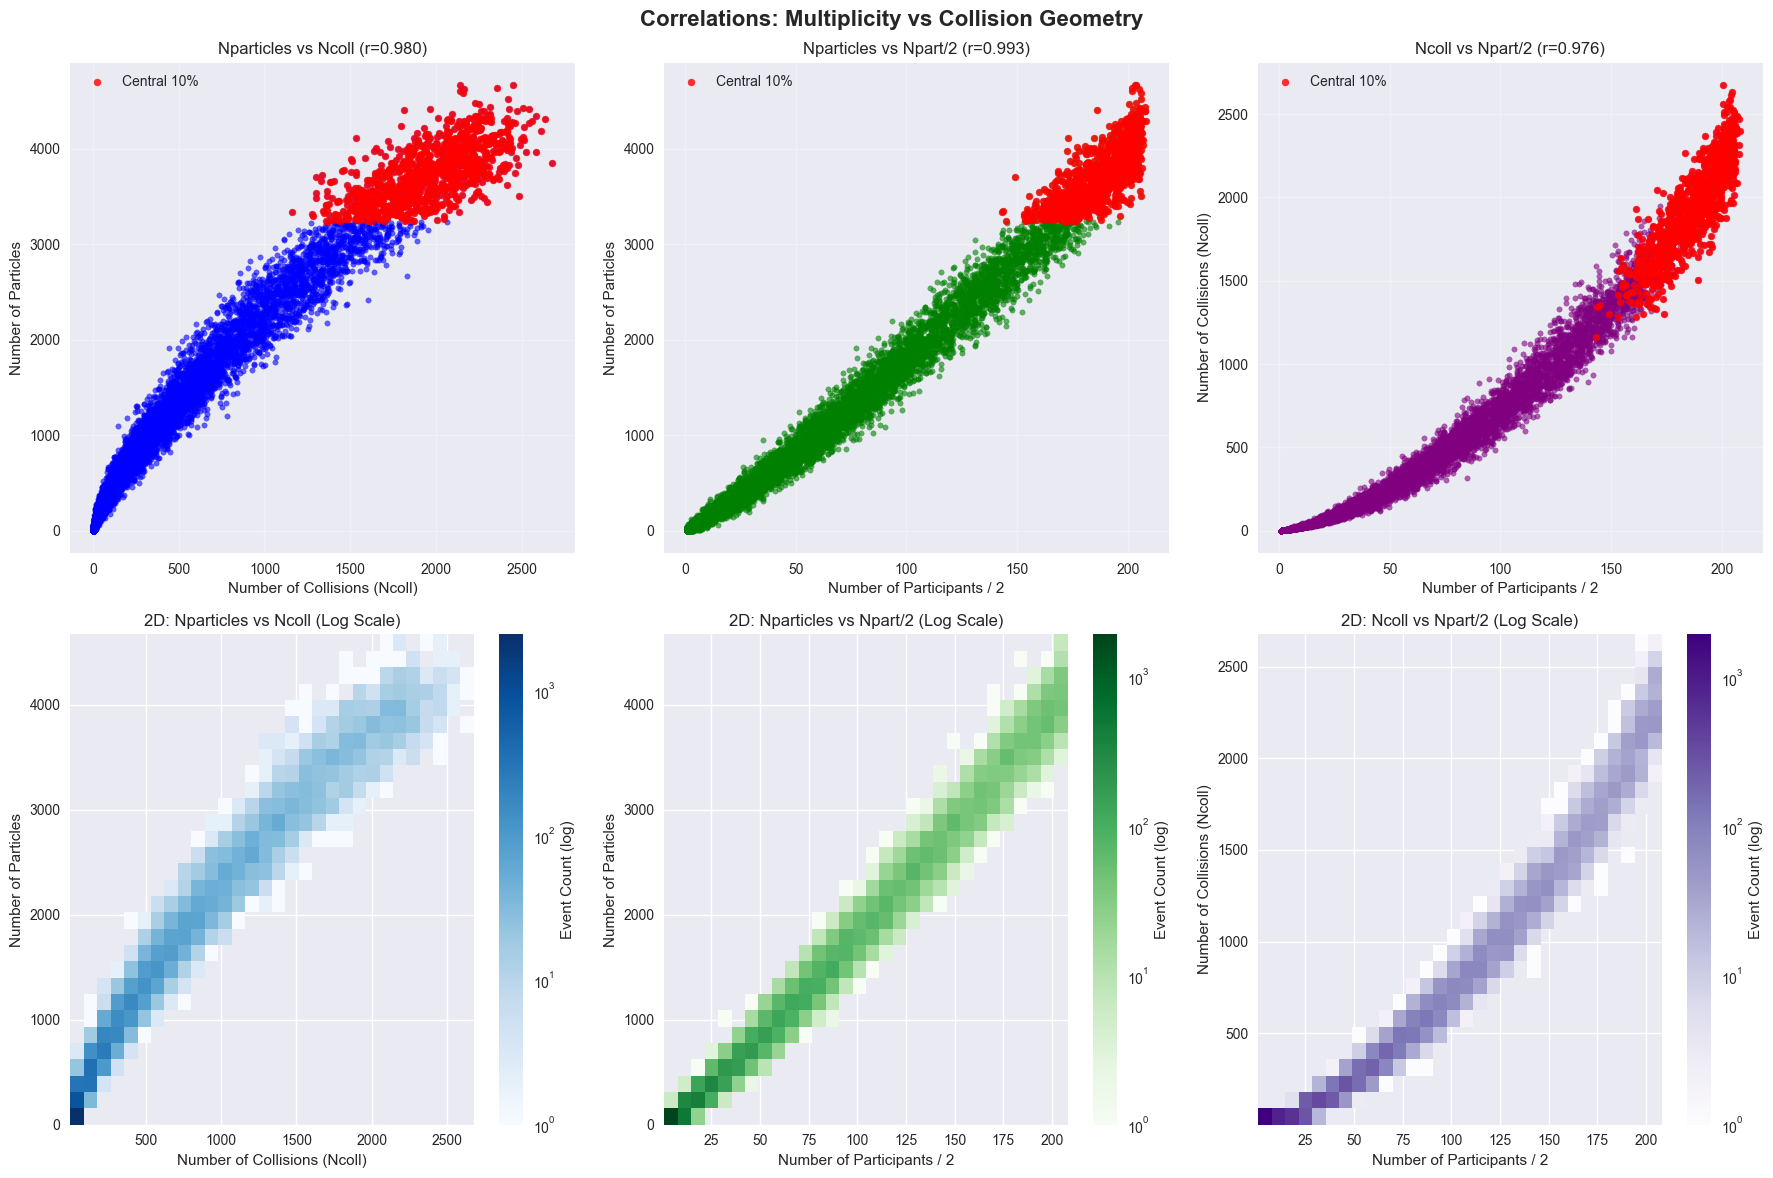

In [12]:
# Correlation analysis: Nparticles vs Ncoll and Npart/2
print("\nCorrelation Analysis")
print("="*20)

# Calculate correlations (npart_over_2 was already calculated in previous cell)
corr_ncoll = np.corrcoef(events_df['n_particles'], events_df['n_collisions'])[0, 1]
corr_npart = np.corrcoef(events_df['n_particles'], events_df['npart_over_2'])[0, 1]
corr_ncoll_npart = np.corrcoef(events_df['n_collisions'], events_df['npart_over_2'])[0, 1]

print(f"Correlations:")
print(f"  Nparticles vs Ncoll:     {corr_ncoll:.4f}")
print(f"  Nparticles vs Npart/2:   {corr_npart:.4f}")
print(f"  Ncoll vs Npart/2:        {corr_ncoll_npart:.4f}")

# Create correlation plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Correlations: Multiplicity vs Collision Geometry', fontsize=16, fontweight='bold')

# Nparticles vs Ncoll
axes[0,0].scatter(events_df['n_collisions'], events_df['n_particles'], alpha=0.6, s=15, color='blue')
axes[0,0].scatter(central_events['n_collisions'], central_events['n_particles'], 
                  alpha=0.8, s=25, color='red', label='Central 10%')
axes[0,0].set_xlabel('Number of Collisions (Ncoll)')
axes[0,0].set_ylabel('Number of Particles')
axes[0,0].set_title(f'Nparticles vs Ncoll (r={corr_ncoll:.3f})')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Nparticles vs Npart/2
axes[0,1].scatter(events_df['npart_over_2'], events_df['n_particles'], alpha=0.6, s=15, color='green')
axes[0,1].scatter(central_events['npart_over_2'], central_events['n_particles'], 
                  alpha=0.8, s=25, color='red', label='Central 10%')
axes[0,1].set_xlabel('Number of Participants / 2')
axes[0,1].set_ylabel('Number of Particles')
axes[0,1].set_title(f'Nparticles vs Npart/2 (r={corr_npart:.3f})')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Ncoll vs Npart/2
axes[0,2].scatter(events_df['npart_over_2'], events_df['n_collisions'], alpha=0.6, s=15, color='purple')
axes[0,2].scatter(central_events['npart_over_2'], central_events['n_collisions'], 
                  alpha=0.8, s=25, color='red', label='Central 10%')
axes[0,2].set_xlabel('Number of Participants / 2')
axes[0,2].set_ylabel('Number of Collisions (Ncoll)')
axes[0,2].set_title(f'Ncoll vs Npart/2 (r={corr_ncoll_npart:.3f})')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 2D histograms for better visualization with log color scale
from matplotlib.colors import LogNorm

h1 = axes[1,0].hist2d(events_df['n_collisions'], events_df['n_particles'], bins=30, cmap='Blues', norm=LogNorm())
axes[1,0].set_xlabel('Number of Collisions (Ncoll)')
axes[1,0].set_ylabel('Number of Particles')
axes[1,0].set_title('2D: Nparticles vs Ncoll (Log Scale)')
plt.colorbar(h1[3], ax=axes[1,0], label='Event Count (log)')

h2 = axes[1,1].hist2d(events_df['npart_over_2'], events_df['n_particles'], bins=30, cmap='Greens', norm=LogNorm())
axes[1,1].set_xlabel('Number of Participants / 2')
axes[1,1].set_ylabel('Number of Particles')
axes[1,1].set_title('2D: Nparticles vs Npart/2 (Log Scale)')
plt.colorbar(h2[3], ax=axes[1,1], label='Event Count (log)')

h3 = axes[1,2].hist2d(events_df['npart_over_2'], events_df['n_collisions'], bins=30, cmap='Purples', norm=LogNorm())
axes[1,2].set_xlabel('Number of Participants / 2')
axes[1,2].set_ylabel('Number of Collisions (Ncoll)')
axes[1,2].set_title('2D: Ncoll vs Npart/2 (Log Scale)')
plt.colorbar(h3[3], ax=axes[1,2], label='Event Count (log)')

plt.tight_layout()
plt.show()


Central vs Peripheral Event Comparison
Central events (10% highest multiplicity):
       impact_parameter  n_participants  n_collisions  n_particles  \
count       1003.000000     1003.000000   1003.000000  1003.000000   
mean           2.745012      374.849452   1948.400798  3736.690927   
std            1.118885       26.417428    273.451052   298.254517   
min            0.099196      286.000000   1163.000000  3246.000000   
25%            1.920540      355.000000   1754.000000  3489.500000   
50%            2.816493      378.000000   1948.000000  3719.000000   
75%            3.601189      398.000000   2157.000000  3947.500000   
max            5.457063      416.000000   2675.000000  4671.000000   

           mean_pT  
count  1003.000000  
mean      0.385888  
std       0.011764  
min       0.351191  
25%       0.378049  
50%       0.385356  
75%       0.392953  
max       0.432893  

Peripheral events (remaining 90%):
       impact_parameter  n_participants  n_collisions  n_part

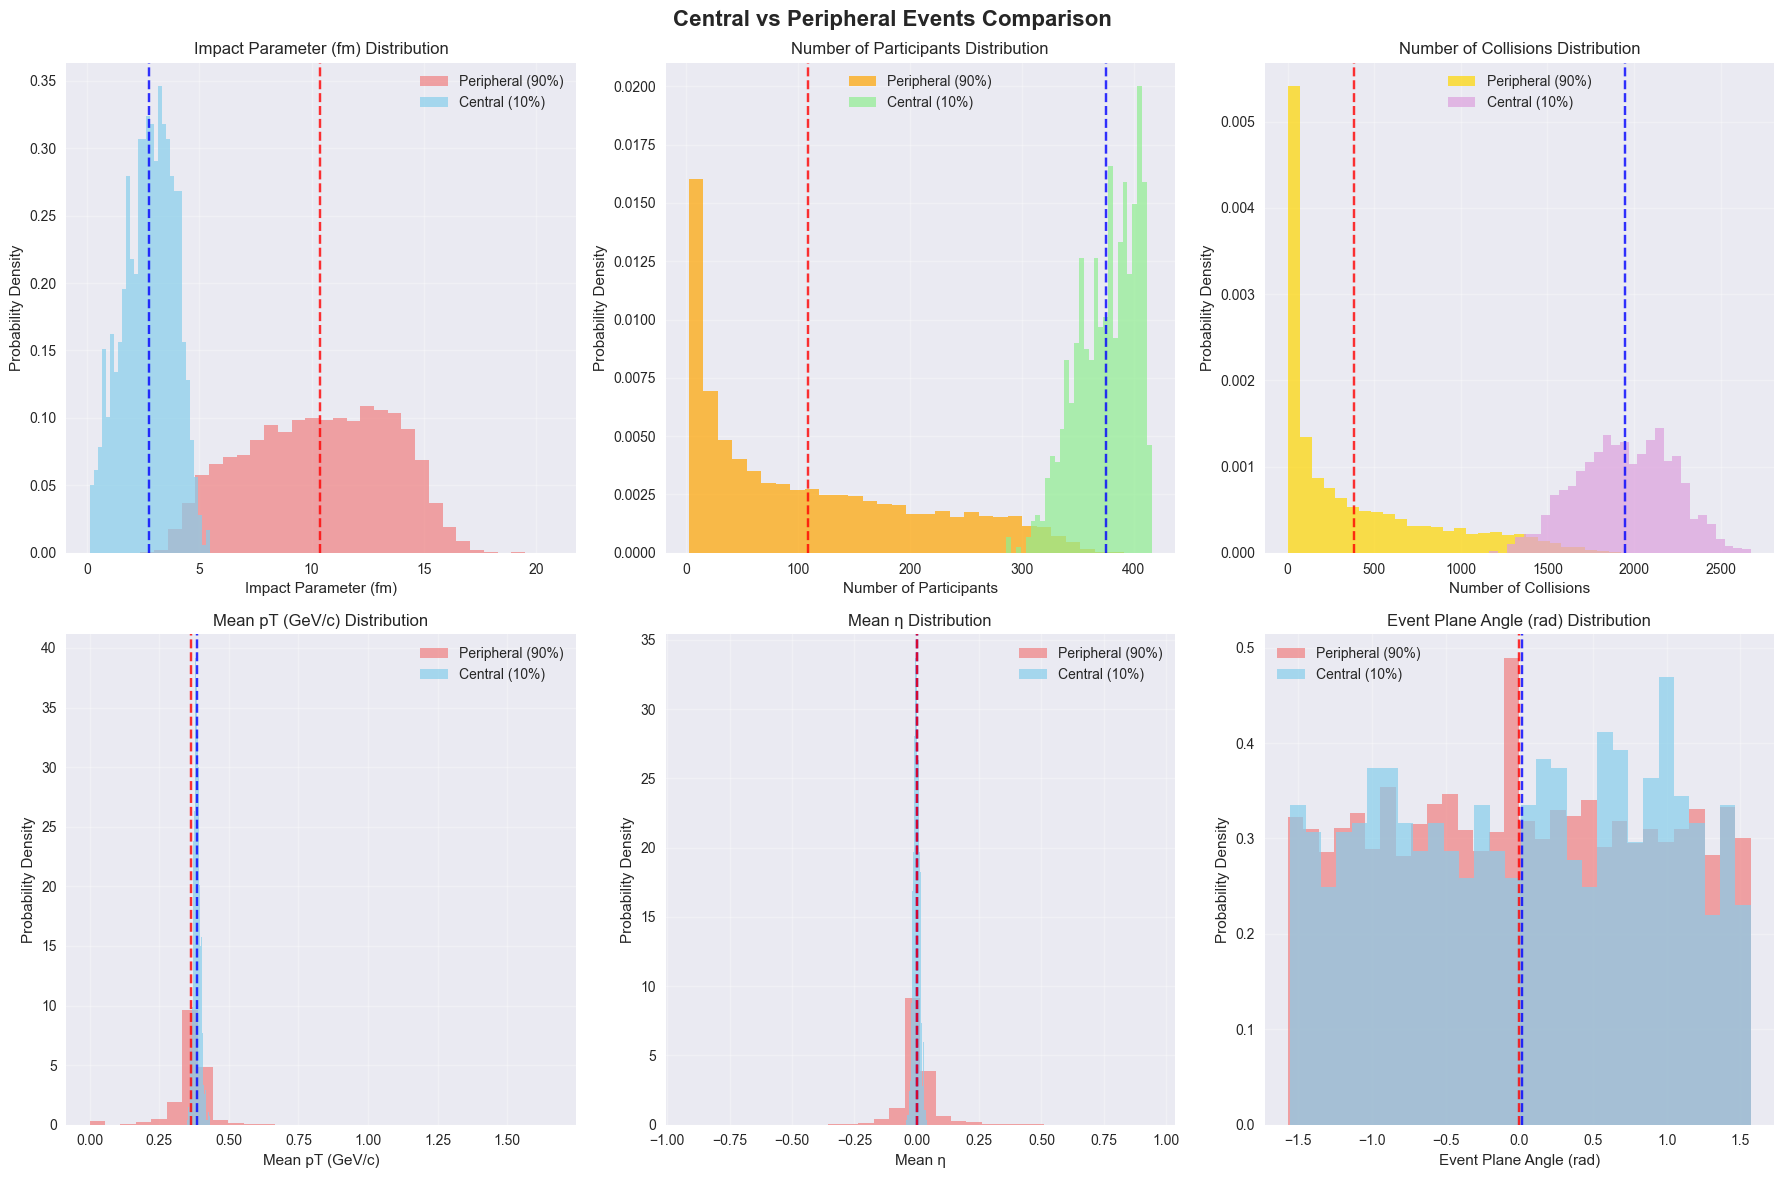


Statistical Tests (Central vs Peripheral):
---------------------------------------------
Impact Parameter (fm):
  Central mean: 2.745, Peripheral mean: 10.364
  Mann-Whitney U p-value: 0.00e+00
  KS test p-value: 9.88e-323

Number of Participants:
  Central mean: 374.849, Peripheral mean: 108.928
  Mann-Whitney U p-value: 0.00e+00
  KS test p-value: 8.89e-323

Number of Collisions:
  Central mean: 1948.401, Peripheral mean: 380.243
  Mann-Whitney U p-value: 0.00e+00
  KS test p-value: 1.58e-322

Mean pT (GeV/c):
  Central mean: 0.386, Peripheral mean: 0.366
  Mann-Whitney U p-value: 1.73e-53
  KS test p-value: 1.04e-104

Mean η:
  Central mean: -0.001, Peripheral mean: 0.001
  Mann-Whitney U p-value: 3.51e-01
  KS test p-value: 1.20e-36

Event Plane Angle (rad):
  Central mean: 0.021, Peripheral mean: -0.004
  Mann-Whitney U p-value: 4.01e-01
  KS test p-value: 1.95e-01



In [ ]:
# Compare central vs peripheral events
print("\nCentral vs Peripheral Event Comparison")
print("="*40)

# Calculate statistics for both samples
central_stats = central_events[['impact_parameter', 'n_participants', 'n_collisions', 'n_particles', 'mean_pT']].describe()
peripheral_stats = peripheral_events[['impact_parameter', 'n_participants', 'n_collisions', 'n_particles', 'mean_pT']].describe()

print("Central events (10% highest multiplicity):")
print(central_stats)
print("\nPeripheral events (remaining 90%):")
print(peripheral_stats)

# Plot comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Central vs Peripheral Events Comparison', fontsize=16, fontweight='bold')

variables = [
    ('impact_parameter', 'Impact Parameter (fm)', 'lightcoral', 'skyblue'),  # Red=central, Blue=peripheral
    ('n_participants', 'Number of Participants', 'orange', 'lightgreen'),  # Keep original contrast
    ('n_collisions', 'Number of Collisions', 'gold', 'plum'),  # Keep original contrast  
    ('mean_pT', 'Mean pT (GeV/c)', 'lightcoral', 'skyblue'),  # Red=central, Blue=peripheral
    ('mean_eta', 'Mean η', 'lightcoral', 'skyblue'),  # Red=central, Blue=peripheral
    ('event_plane_angle', 'Event Plane Angle (rad)', 'lightcoral', 'skyblue')  # Red=central, Blue=peripheral
]

for i, (var, label, color_central, color_peripheral) in enumerate(variables):
    row, col = i // 3, i % 3
    
    # Plot histograms
    axes[row, col].hist(peripheral_events[var], bins=30, alpha=0.7, 
                       color=color_peripheral, label='Peripheral (90%)', density=True)
    axes[row, col].hist(central_events[var], bins=30, alpha=0.7, 
                       color=color_central, label='Central (10%)', density=True)
    
    axes[row, col].set_xlabel(label)
    axes[row, col].set_ylabel('Probability Density')
    axes[row, col].set_title(f'{label} Distribution')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    # Add mean lines with inverted colors
    central_mean = central_events[var].mean()
    peripheral_mean = peripheral_events[var].mean()
    axes[row, col].axvline(central_mean, color='red', linestyle='--', alpha=0.8, label='Central mean')
    axes[row, col].axvline(peripheral_mean, color='blue', linestyle='--', alpha=0.8, label='Peripheral mean')

plt.tight_layout()
plt.show()

# Statistical tests
from scipy.stats import mannwhitneyu, ks_2samp

print("\nStatistical Tests (Central vs Peripheral):")
print("-" * 45)
for var, label, _, _ in variables:
    # Mann-Whitney U test (non-parametric)
    statistic, p_value = mannwhitneyu(central_events[var], peripheral_events[var], alternative='two-sided')
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = ks_2samp(central_events[var], peripheral_events[var])
    
    central_mean = central_events[var].mean()
    peripheral_mean = peripheral_events[var].mean()
    
    print(f"{label}:")
    print(f"  Central mean: {central_mean:.3f}, Peripheral mean: {peripheral_mean:.3f}")
    print(f"  Mann-Whitney U p-value: {p_value:.2e}")
    print(f"  KS test p-value: {ks_p:.2e}")
    print()